In [1]:
#%%
#------------------------------------#
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

(array([   4.,   27.,  225.,  802., 1140.,  674.,  184.,   72.,  113.,
         172.,  210.,  333.,  492.,  564.,  652.,  714.,  705.,  658.,
         576.,  536.,  370.,  279.,  192.,  128.,   80.,   44.,   30.,
          17.,    4.,    3.]),
 array([-2.2424909 , -1.73359591, -1.22470092, -0.71580593, -0.20691094,
         0.30198405,  0.81087904,  1.31977402,  1.82866901,  2.337564  ,
         2.84645899,  3.35535398,  3.86424897,  4.37314395,  4.88203894,
         5.39093393,  5.89982892,  6.40872391,  6.9176189 ,  7.42651388,
         7.93540887,  8.44430386,  8.95319885,  9.46209384,  9.97098883,
        10.47988382, 10.9887788 , 11.49767379, 12.00656878, 12.51546377,
        13.02435876]),
 <a list of 30 Patch objects>)

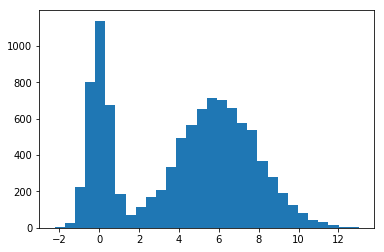

In [2]:
#%%
#------------------------------------#
#注意数据的统计信息,在raw_data_array的初始化中
raw_data_array = np.concatenate((np.random.normal(0, 0.5, [3000, 1]), np.random.normal(6, 2, [7000, 1])))
data = pd.DataFrame(raw_data_array, index=np.linspace(1, 10000, 10000, dtype=int), columns=['height'])

plt.hist(data['height'], bins=30)

In [3]:
#%%
#GMM初始化模型参数
c1 = 0.7
c2 = 0.3
u1 = -1.0
u2 = 2.0
th1 = 1
th2 = 1

data['p1'] = 0.5
data['p2'] = 0.5
data.sample(10)

,height,p1,p2
1129,0.295555,0.5,0.5
4670,2.897268,0.5,0.5
4602,5.631501,0.5,0.5
5351,7.958142,0.5,0.5
7390,3.229636,0.5,0.5
2232,-0.218458,0.5,0.5
9333,6.255733,0.5,0.5
9792,3.115185,0.5,0.5
3293,7.681208,0.5,0.5
5532,6.939340,0.5,0.5


In [4]:
#%%
#------------------------------------#
#公式见语音识别实践(2.10)~(2.13)
import math
for epoch in range(5):
    for i in range(len(data)):
        data.iloc[i]['p1'] = float(c1*math.exp(-((data.iloc[i]['height']-u1)/th1)**2/2)/pow(2*math.pi*th1*th1, 0.5))
        data.iloc[i]['p2'] = float(c2*math.exp(-((data.iloc[i]['height']-u2)/th2)**2/2)/pow(2*math.pi*th2*th2, 0.5))
        x = data.iloc[i]['p1'] + data.iloc[i]['p2']
        data.iloc[i]['p1'] = data.iloc[i]['p1']/x
        data.iloc[i]['p2'] = data.iloc[i]['p2']/x

    c1 = data['p1'].mean()
    c2 = data['p2'].mean()
    u1 = (data['p1']*data['height']).sum()/(data['p1'].sum())
    u2 = (data['p2']*data['height']).sum()/(data['p2'].sum())
    th1 = pow((data['p1']*pow(data['height']-u1, 2)).sum()/data['p1'].sum(), 0.5)
    th2 = pow((data['p2']*pow(data['height']-u2, 2)).sum()/data['p2'].sum(), 0.5)
    print("{} times processed:".format(epoch))
    print("\tc1={}, c2={}, \n\tu1={}, u2={}, \n\tth1={}, th2={}".format(c1, c2, u1, u2, th1, th2))

#%%

0 times processed:
	c1=0.2589740797333065, c2=0.7410259202666903, 
	u1=-0.08645806117455036, u2=5.697630413632074, 
	th1=0.4874920152205044, th2=2.320560458984234
1 times processed:
	c1=0.2819609023441374, c2=0.7180390976558602, 
	u1=-0.03811045490681493, u2=5.8638131207240125, 
	th1=0.4774258194519471, th2=2.1618651757425824
2 times processed:
	c1=0.2917555460834073, c2=0.7082444539165923, 
	u1=-0.02362590432562863, u2=5.939466788802607, 
	th1=0.489468020866796, th2=2.0768365567597766
3 times processed:
	c1=0.29619655739213235, c2=0.7038034426078678, 
	u1=-0.01570558999462237, u2=5.973760727686181, 
	th1=0.4987814866946307, th2=2.0369726803358774
4 times processed:
	c1=0.2982041919351712, c2=0.7017958080648282, 
	u1=-0.011459503994517504, u2=5.989090626647634, 
	th1=0.5040060767719267, th2=2.0191422486533352


In [5]:
data.sample(10)

,height,p1,p2
1314,0.298501,9.855770e-01,0.014423
6947,7.896016,6.208457e-55,1.000000
1576,0.400427,9.808597e-01,0.019140
826,-0.126992,9.933186e-01,0.006681
4807,5.010040,1.728075e-22,1.000000
8541,7.692648,3.364475e-52,1.000000
3754,5.189873,4.122476e-24,1.000000
3203,8.007395,1.848970e-56,1.000000
8985,8.916211,1.132536e-69,1.000000
3218,4.923744,9.937142e-22,1.000000
